<a href="https://colab.research.google.com/github/viandre7/Viviana_GarciaMonje_KC/blob/main/Proyecto_final_Misi%C3%B3n_TIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archivos**

**1.** Misi_n_TIC_2020_100_mil_programadores.csv

**2.** colombia.geo.json

**3.** Presentación

**Link** 

https://drive.google.com/drive/folders/1pTPkhnRP8GrmiygQ6Fz9b62BDcW-CAEE?usp=sharing

# **Misión TIC 2020 100 mil programadores**



Información de estudiantes y aspirantes. 

La ruta de aprendizaje 1 va dirigida a estudiantes de grados 9, 10 y 11 de colegios oficiales del país. Los estudiantes podrán escoger entre fundamentos de programación e industrias creativas digitales. 

La ruta de aprendizaje 2 va dirigida a los colombianos que se encuentren interesados en desarrollar en desarrollar habilidades en programación. Cuenta con un ciclo básico (programación básica, fundamentos de programación y desarrollo de software); y ciclo de profundización (desarrollo de aplicaciones web y desarrollo de aplicaciones móviles).

In [ ]:
pip install geopandas

##**1. Importación de las librerias**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sb
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler


import folium  #needed for interactive map
from folium.plugins import HeatMap
import branca
import geopandas as gpd
import math
from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/G2 - Data Sience 2021 (Keycode)/Proyecto_final'

/content/gdrive/MyDrive/G2 - Data Sience 2021 (Keycode)/Proyecto_final


##**2. Importar los datos**

In [ ]:
data = pd.read_csv('Misi_n_TIC_2020_100_mil_programadores.csv')
data.head(5)

,FECHA_CORTE,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,ESTADO_FORMACION,ESTADOS,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GENERO,RUTA,GRADO,META_BENEFICIARIO,INVERSION,META_DINERO,FECHA_VIGENCIA
0,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2021-12-31
1,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2021-12-31
2,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2021-12-31
3,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2021-12-31
4,2021-10-01,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1,NaN,NaN,NaN,2021-12-31


###**2.1 Análisis del Dataset**

In [ ]:
# Verificamos las dimensiones del dataset

data.shape

(429699, 15)

In [ ]:
# Verificamos los nulls por columna

data.isnull().sum()

FECHA_CORTE               0
DEPARTAME_NOMBRE          0
MUNICIPIO_NOMBRE          0
ESTADO_FORMACION          0
ESTADOS                   0
CONVOCATORIA              0
ESTRATO_SOCIAL            0
EDAD                      0
GENERO                    0
RUTA                      0
GRADO                     0
META_BENEFICIARIO    429699
INVERSION            429699
META_DINERO          429699
FECHA_VIGENCIA            0
dtype: int64

**Nota:** Eliminamos las columnas META_BENEFICIARIO,INVERSION, META_DINERO, ya que no nos está aportando ninguna información, no afecta el dataset

In [ ]:
data= data.drop(columns=['META_BENEFICIARIO','INVERSION','META_DINERO','FECHA_CORTE', 'FECHA_VIGENCIA'])
data.head(5)

,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,ESTADO_FORMACION,ESTADOS,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GENERO,RUTA,GRADO
0,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
1,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
2,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
3,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
4,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1


**Nota:** Se remmplaza la letra a que se encuentra en la columna de ESTRATO_SOCIAL por el número 0 por cuestiones de normalización

In [ ]:
data['ESTRATO_SOCIAL']=data.ESTRATO_SOCIAL.replace(to_replace=['a'], value=[0])
data.head()

,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,ESTADO_FORMACION,ESTADOS,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GENERO,RUTA,GRADO
0,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
1,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
2,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
3,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1
4,QUINDIO,ARMENIA,ASPIRANTE,ASPIRANTES,1,3,29,MASCULINO,RUTA 2,-1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429699 entries, 0 to 429698
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DEPARTAME_NOMBRE  429699 non-null  object
 1   MUNICIPIO_NOMBRE  429699 non-null  object
 2   ESTADO_FORMACION  429699 non-null  object
 3   ESTADOS           429699 non-null  object
 4   CONVOCATORIA      429699 non-null  int64 
 5   ESTRATO_SOCIAL    429699 non-null  object
 6   EDAD              429699 non-null  int64 
 7   GENERO            429699 non-null  object
 8   RUTA              429699 non-null  object
 9   GRADO             429699 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 32.8+ MB


##**3. Análisis de las columnas**


###**3.1 Exploracion de columnas categoricas**

In [ ]:
data['DEPARTAME_NOMBRE'].value_counts()

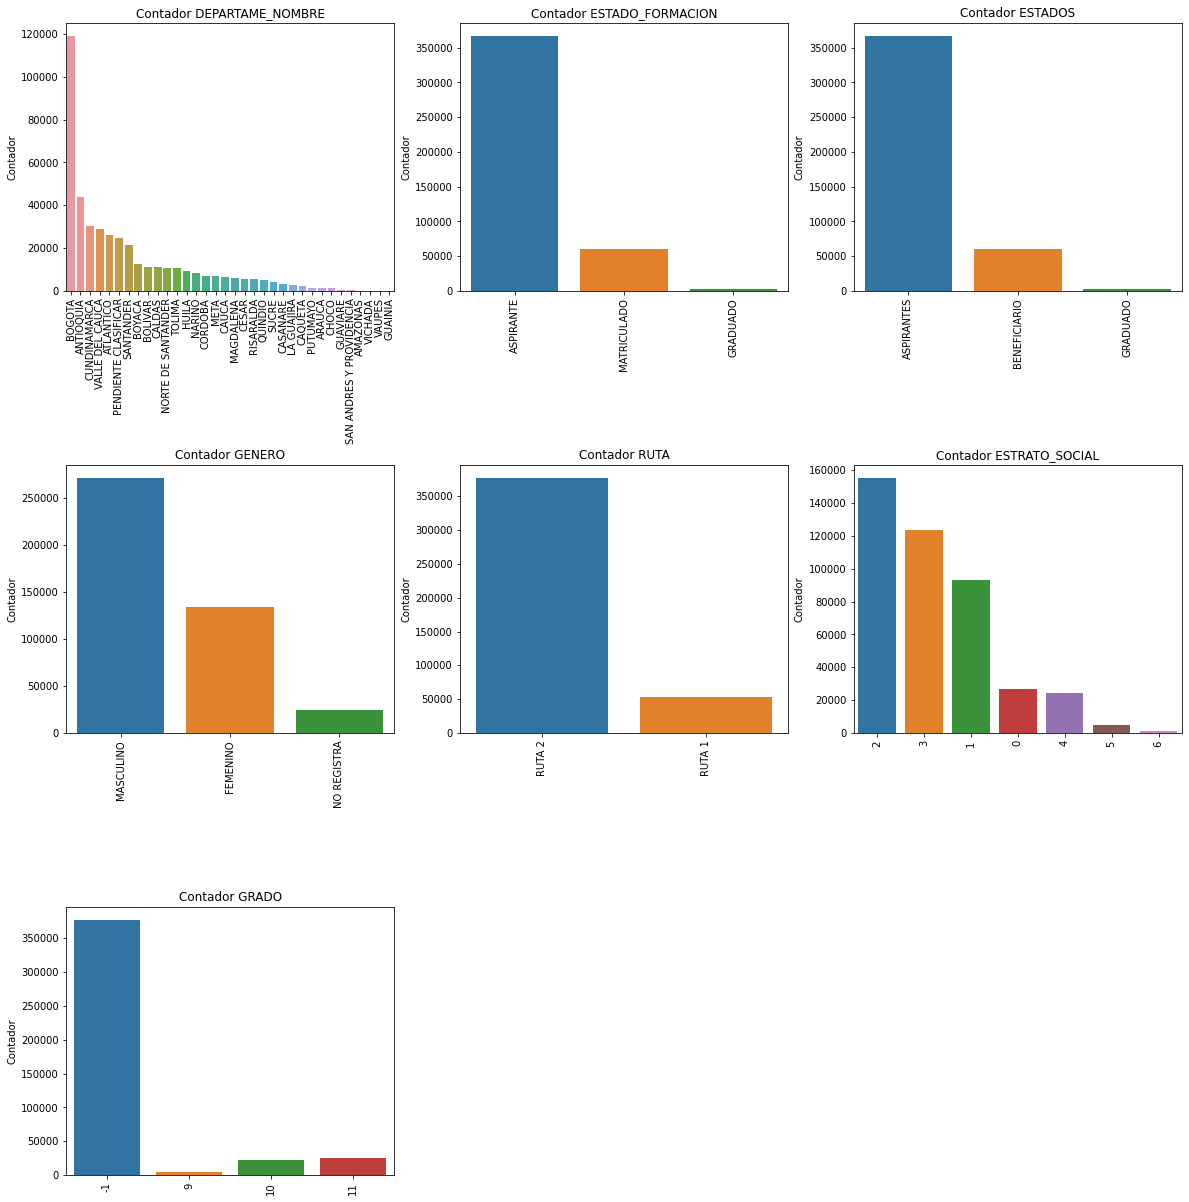

In [ ]:
plt.figure(figsize=(20,20))
vars_to_plot = ['DEPARTAME_NOMBRE', 'ESTADO_FORMACION', 'ESTADOS', 'GENERO', 'RUTA','ESTRATO_SOCIAL', 'GRADO']
for i, var in enumerate(vars_to_plot):
    # Figura 4 filas y 3 columnas
    plt.subplot(3,3,i+1) 
    value_counts = data[var].value_counts()
    ax=sb.barplot(x=value_counts.index, y= value_counts.values, orient="v")
    title_string = "Contador " + var
    plt.ylabel("Contador")
    plt.title(title_string)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.65)

**Análisis** 

Podemos observar que en la columna DEPARTAME_NOMBRE, el departamento de Bogotá es el que mas registra aspirantes y matriculados para el programa mision tic, seguidos de Antioquia, Cundinamarca, y los departamentos  del Guaviare, Amazonas, San Andres y providencia tienen menos participación, esto podria deberse a que la población es mucho menor, y los recursos de los habitantes difieren a los de los primeros departamentos mencionados, marcando una clara desigualdad social y económina a primera vista.

También podemos observar que en la categoría de género, los hombres tienden a ser quienes más se interesan por el tema de la programación.

Se puede notar que la participación en este prográma de las personas que ya no estan cursando estudios secundarios es bastante grande a diferencia de los estudiantes de 10 y 11.



###**3.2 Exploracion de columnas númericas**


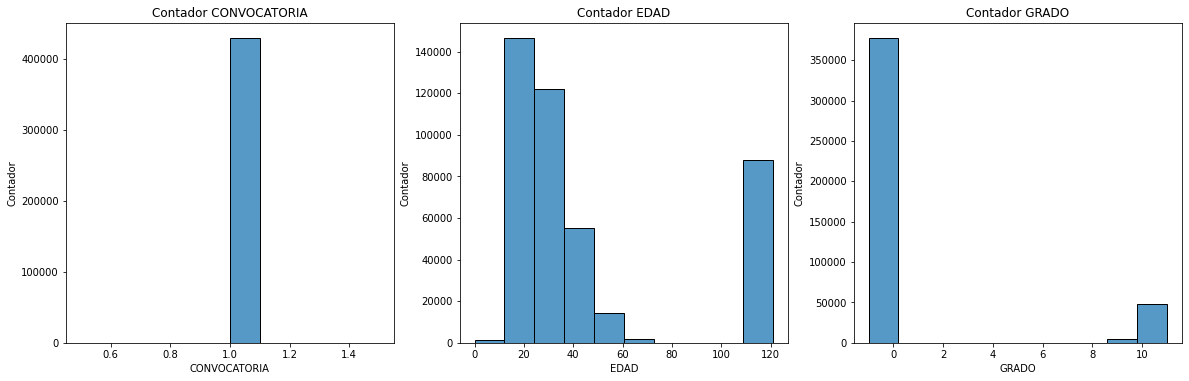

In [ ]:
plt.figure(figsize=(20,20))
vars_to_plot = ['CONVOCATORIA', 'EDAD', 'GRADO']

for i, var in enumerate(vars_to_plot):
    # Figura 4 filas y 3 columnas 
    plt.subplot(3,3,i+1)    
    value_counts = data[var]
    ax=sb.histplot(value_counts,bins=10)
    title_string = "Contador " + var
    plt.ylabel("Contador")
    plt.title(title_string)

**Análisis** 

Podemos ver que la columna Edad tiene valores atípicos. Posiblemente hay valores incorrectos (datos ruidosos), por lo que deberíamos mirar más de cerca los datos y decidir cómo gestionamos el ruido.

Veamos más de cerca los valores de la columna EDAD

In [ ]:
data[['EDAD']].describe()

,EDAD
count,429699.000000
mean,47.216964
std,38.624612
min,0.000000
25%,21.000000
50%,30.000000
75%,47.000000
max,121.000000


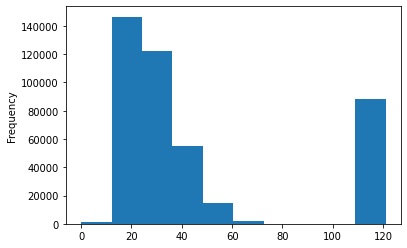

In [ ]:
data['EDAD'].plot.hist()

In [ ]:
calcular=(80000*100)/429699
print(calcular)

18.617683541269585


**Análisis** 

El valor máximo de en la columna edad es de 121, lo cual nos indica que puede existir un error en la información que contiene dicha columna, ya que no es un dato real.
Lo interesante es que la frecunecia con la cual aparece este dato es superior a los 80.0000 de 429.699, un 18% de los datos

------------------------


###**3.3 Análisis de 3 variables con barplot**

1. Genero, Edad, Estrato_social
2. Estados, Edad, Estrato_social
3. Genero, Edad, Estados

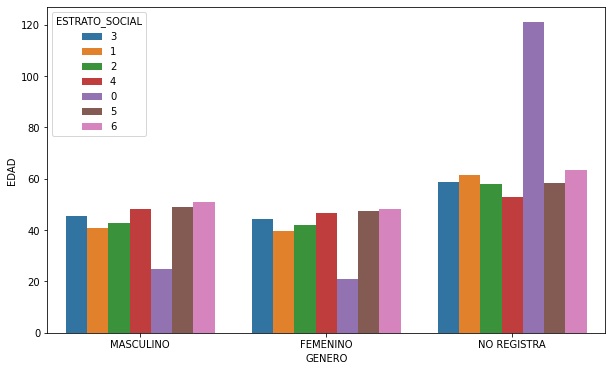

In [ ]:
plt.figure(figsize=(10,6))
sb.barplot(x='GENERO',y='EDAD',data=data,hue='ESTRATO_SOCIAL',ci=False)


**Análisis** 

Podemos observar que en ambos géneros se presenta una participación alta en las personas mayores de 40 años en casi todos los estratos sociales, podrían ser personas con una profesión que debido a la pandemia decidieron ampliar sus espectativas y posibilidades, sin embargo no deja de ser una hipotesis, ya que nos falta información de la formación acádemica de los aspirantes y benéficiarios para confirmarlo.

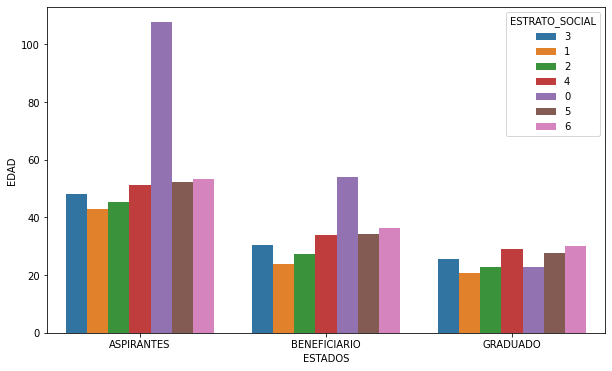

In [ ]:
plt.figure(figsize=(10,6))
sb.barplot(x='ESTADOS',y='EDAD',data=data,hue='ESTRATO_SOCIAL',ci=False)

**Análisis** 

Podemos observar que quienes mayor oportunidad tuvieron como beneficiarios fueron quienes se encuentran en el estrato 0 (a en el dataset), siguiendo quienes están en los estratos 5,4,3,2, y por último el estrato 1, personas consideradas en estado de condicion vulnerable en su mayoría según el SISBEN. 
Es interesante observar que quienes deciden aprovechar esta ayuda del gobierno son personas que están en una mejor condición de ingresos.

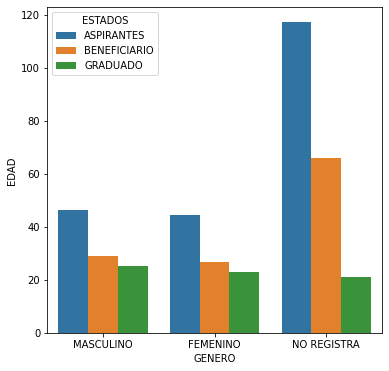

In [ ]:
plt.figure(figsize=(6,6))
sb.barplot(x='GENERO',y='EDAD',data=data,hue='ESTADOS',ci=False)

**Análisis**

Podemos observar que existe un patrón similar entre a las mujeres y los hombres referente a la edad y el estado en el programa

###**3.4 Análisis de género vs estado**



Text(0.5, 1.0, 'GENERO MASCULINO')

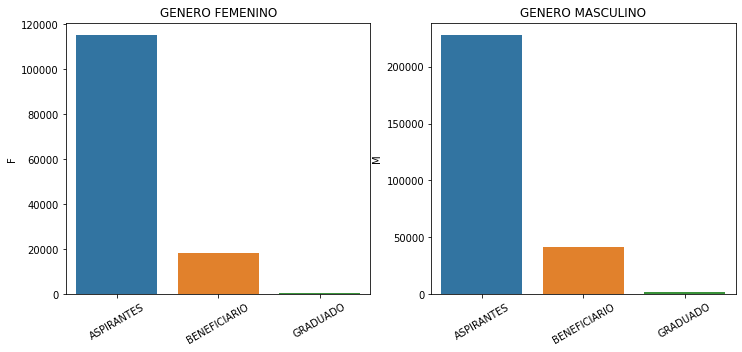

In [ ]:
#genero vs estados
j_df = pd.DataFrame()
j_df['F'] = data[data['GENERO'] == 'FEMENINO']['ESTADOS'].value_counts()
j_df['M'] = data[data['GENERO'] == 'MASCULINO']['ESTADOS'].value_counts()

plt.figure(figsize=(12,5))
plt.subplot(121)
ax=sb.barplot(x=j_df.index,y=j_df.F)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('GENERO FEMENINO')
plt.subplot(122)
ax=sb.barplot(x=j_df.index,y=j_df.M)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('GENERO MASCULINO')

**Análisis** 

Las gráficas anteriores nos muestran que la cantidad de hombres que se inscribieron y estan en calidad de aspirantes es casi el doble que el de las mujeres, lo cual nos indica que aún hay una brecha enorme en cuanto a las preferencias en el area de la Ti, no obstante el programa ha dado una participación en condición de beneficiario equitativa, acorde cantidad de interesados.

##**4.Visualización espacial**

In [ ]:
data['DEPARTAME_NOMBRE'].unique()

array(['QUINDIO', 'CAUCA', 'NARIÑO', 'VALLE DEL CAUCA', 'MAGDALENA',
       'CUNDINAMARCA', 'ATLANTICO', 'TOLIMA', 'SANTANDER', 'BOYACA',
       'CALDAS', 'META', 'CORDOBA', 'ANTIOQUIA', 'CESAR', 'RISARALDA',
       'BOLIVAR', 'NORTE DE SANTANDER', 'HUILA', 'BOGOTA', 'SUCRE',
       'CAQUETA', 'VAUPES', 'PUTUMAYO', 'CASANARE', 'GUAVIARE', 'CHOCO',
       'ARAUCA', 'VICHADA', 'LA GUAJIRA', 'AMAZONAS',
       'PENDIENTE CLASIFICAR', 'GUAINIA', 'SAN ANDRES Y PROVIDENCIA'],
      dtype=object)

In [ ]:
#Se reemplazan el nombre de los departamentos para que queden igual al archivo Colombia.geo.json, y así poder realizar el join
data['DEPARTAME_NOMBRE']=data['DEPARTAME_NOMBRE'].replace(['BOGOTA'], 'SANTAFE DE BOGOTA D.C')
data['DEPARTAME_NOMBRE']=data['DEPARTAME_NOMBRE'].replace(['SAN ANDRES Y PROVIDENCIA'], 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA')
data['DEPARTAME_NOMBRE']=data['DEPARTAME_NOMBRE'].replace(['NARIÑO'], 'NARINO')

###**4.1 Visualización espacial por media (EDAD)**

,EDAD,DEPARTAME_NOMBRE
DEPARTAME_NOMBRE,,
AMAZONAS,44.617925,AMAZONAS
ANTIOQUIA,44.871548,ANTIOQUIA
ARAUCA,40.906135,ARAUCA


,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."


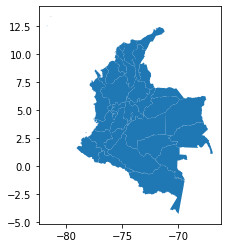

In [ ]:
df= pd.DataFrame(data.groupby(['DEPARTAME_NOMBRE'])['EDAD'].mean())
df['DEPARTAME_NOMBRE'] = df.index
display(df.head(3))
# Archivo Geojson 
df_geo = gpd.read_file('colombia.geo.json')
display(df_geo.head(3))
df_join = df_geo.merge(df, how='inner', left_on="NOMBRE_DPT", right_on=df.index)

df_geo.plot()
# df_join.head(3)


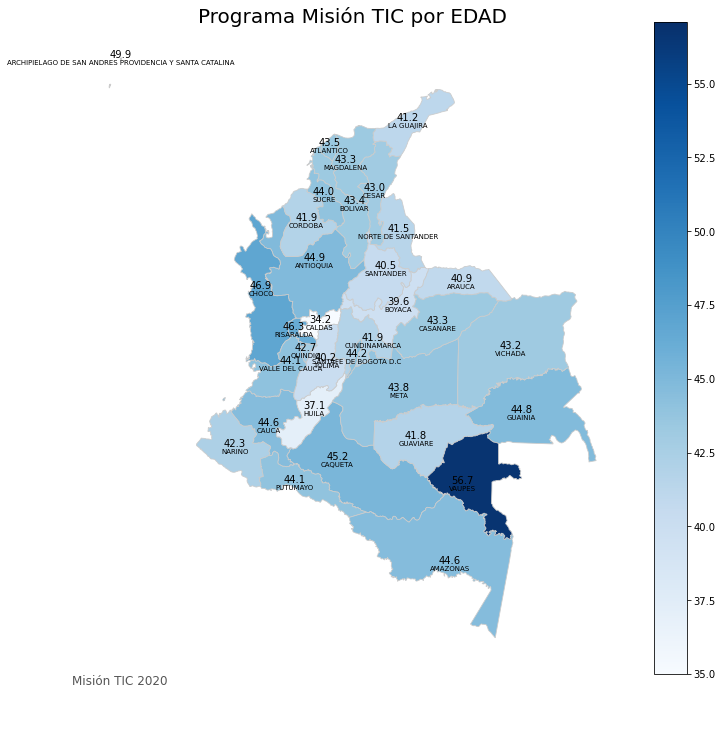

In [ ]:
# Establecer una variable que llamará a cualquier columna que queramos visualizar en el mapa
values = 'EDAD'
# establecer el rango de valores para la coropleta
vmin, vmax = math.ceil(np.min(df_join['EDAD'])),math.ceil(np.max(df_join['EDAD']))+0.1
# Crear figura y ejes para Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 12))
# quitar el eje
ax.axis('off')
# Agregar titulo
title = 'Programa Misión TIC por {}'.format(values)
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '2'})
# Crear una anotación para la fuente de datos
ax.annotate('Misión TIC 2020',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')
# crear mapa
df_join.plot(column=values, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax),legend=True, alpha=1, k=6)
# Agregar etiquetas de valor
df_join['coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['coords'] = [coords[0] for coords in df_join['coords']]
for idx, row in df_join.iterrows():
    plt.annotate(s=row['NOMBRE_DPT'], xy=row['coords'],horizontalalignment='center',size=7,verticalalignment='top')
# Añadir números y nombres
df_join['coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['coords'] = [coords[0] for coords in df_join['coords']]
for idx, row in df_join.iterrows():
    plt.annotate(s=round(row['EDAD'],1), xy=row['coords'],horizontalalignment='center',verticalalignment='bottom')

**Análisis**

La edad media de la población inscrita ronda entre los 37 y 46 años, denotando una participación alta de población con un grado de madurés y tal vez estudios y/o proyectos realizados. 
Teniendo en cuenta lo anterior podriamos inferir que la población dia a dia se ha dado cuenta de que la programación, y en si el mundo de las TIC (Tecnologías de la Información y la Comunicación) es para aquellos que tienen pasión por ella, sin importar la profesión.


###**4.1 Visualización espacial por conteo**

In [ ]:
#Vamos a discriminar los valores de las columnas, creando una columna por cada uno de dichos valores, eliminando la principal, y así evitar conflictos
data2 = pd.get_dummies(data, columns=['ESTADOS', 'GENERO', 'RUTA', 'ESTRATO_SOCIAL','GRADO'], drop_first=False)
data2.head(5)

,DEPARTAME_NOMBRE,MUNICIPIO_NOMBRE,ESTADO_FORMACION,CONVOCATORIA,EDAD,ESTADOS_ASPIRANTES,ESTADOS_BENEFICIARIO,ESTADOS_GRADUADO,GENERO_FEMENINO,GENERO_MASCULINO,GENERO_NO REGISTRA,RUTA_RUTA 1,RUTA_RUTA 2,ESTRATO_SOCIAL_0,ESTRATO_SOCIAL_1,ESTRATO_SOCIAL_2,ESTRATO_SOCIAL_3,ESTRATO_SOCIAL_4,ESTRATO_SOCIAL_5,ESTRATO_SOCIAL_6,GRADO_-1,GRADO_9,GRADO_10,GRADO_11
0,QUINDIO,ARMENIA,ASPIRANTE,1,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,QUINDIO,ARMENIA,ASPIRANTE,1,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,QUINDIO,ARMENIA,ASPIRANTE,1,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,QUINDIO,ARMENIA,ASPIRANTE,1,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,QUINDIO,ARMENIA,ASPIRANTE,1,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ESTADOS_ASPIRANTES,ESTADOS_BENEFICIARIO,ESTADOS_GRADUADO,GENERO_FEMENINO,GENERO_MASCULINO,GENERO_NO REGISTRA,RUTA_RUTA 1,RUTA_RUTA 2,ESTRATO_SOCIAL_0,ESTRATO_SOCIAL_1,ESTRATO_SOCIAL_2,ESTRATO_SOCIAL_3,ESTRATO_SOCIAL_4,ESTRATO_SOCIAL_5,ESTRATO_SOCIAL_6,GRADO_-1,GRADO_11,GRADO_9,GRADO_10,DEPARTAME_NOMBRE
DEPARTAME_NOMBRE,,,,,,,,,,,,,,,,,,,,
AMAZONAS,195,17,0,62,150,0,19,193,5,76,103,26,2,0,0,193,9,0,10,AMAZONAS
ANTIOQUIA,37298,6316,387,13448,30355,198,5217,38784,291,5280,15591,17313,3805,1449,272,38784,2607,538,2072,ANTIOQUIA
ARAUCA,1175,169,9,424,929,0,188,1165,16,828,429,78,0,2,0,1165,94,9,85,ARAUCA


,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."


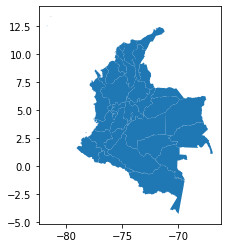

In [ ]:
df_conunt= pd.DataFrame(data2.groupby(['DEPARTAME_NOMBRE'])['ESTADOS_ASPIRANTES','ESTADOS_BENEFICIARIO', 'ESTADOS_GRADUADO', \
                                                    'GENERO_FEMENINO','GENERO_MASCULINO', 'GENERO_NO REGISTRA', 'RUTA_RUTA 1','RUTA_RUTA 2', 'ESTRATO_SOCIAL_0', 'ESTRATO_SOCIAL_1', 'ESTRATO_SOCIAL_2'\
                                                     , 'ESTRATO_SOCIAL_3', 'ESTRATO_SOCIAL_4', 'ESTRATO_SOCIAL_5', 'ESTRATO_SOCIAL_6', 'GRADO_-1', 'GRADO_11', 'GRADO_9', 'GRADO_10'].sum()).astype(int)
df_conunt['DEPARTAME_NOMBRE'] = df_conunt.index
display(df_conunt.head(3))
# Archiovo eojson 
df_geo = gpd.read_file('colombia.geo.json')
display(df_geo.head(3))

df_join_count = df_geo.merge(df_conunt, how='inner', left_on="NOMBRE_DPT", right_on=df.index)
df_geo.plot()


In [ ]:
df_join_count.head(3)

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,ESTADOS_ASPIRANTES,ESTADOS_BENEFICIARIO,ESTADOS_GRADUADO,GENERO_FEMENINO,GENERO_MASCULINO,GENERO_NO REGISTRA,RUTA_RUTA 1,RUTA_RUTA 2,ESTRATO_SOCIAL_0,ESTRATO_SOCIAL_1,ESTRATO_SOCIAL_2,ESTRATO_SOCIAL_3,ESTRATO_SOCIAL_4,ESTRATO_SOCIAL_5,ESTRATO_SOCIAL_6,GRADO_-1,GRADO_11,GRADO_9,GRADO_10,DEPARTAME_NOMBRE
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",37298,6316,387,13448,30355,198,5217,38784,291,5280,15591,17313,3805,1449,272,38784,2607,538,2072,ANTIOQUIA
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",22609,3352,191,8426,17549,177,3806,22346,207,9917,8985,5209,1463,279,92,22346,1784,462,1560,ATLANTICO
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360...",98892,19379,822,37358,81262,473,8433,110660,473,8802,47394,51154,9426,1423,421,110660,4077,865,3491,SANTAFE DE BOGOTA D.C


In [ ]:
def make_plot(geo_df,values):
    # Establecer una variable que llamará a cualquier columna que queramos visualizar en el mapa
    values = geo_df.columns[values]
    # Establecer el rango de valores para la coropleta

    # vmin, vmax = math.ceil(np.min(geo_df[values])),math.ceil(np.max(geo_df[values]))+0.1
    vmin, vmax = 0,15000
    # Crear figura y ejes para Matplotlib
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    # Quitar el eje
    ax.axis('off')
    # Agregar un titulo
    title = 'Programa Misión TIC por {}'.format(values)
    ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '2'})
    # Crear una anotación para la fuente de datos
    ax.annotate('Misión TIC 2020',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')
    # Crear Mapa
    geo_df.plot(column=values, cmap='jet', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax),legend=True, alpha=1, k=5)

    # Agregar etiquetas de valor, números y nombres
    geo_df['coords'] = geo_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    geo_df['coords'] = [coords[0] for coords in geo_df['coords']]
    for idx, row in df_join_count.iterrows():
        plt.annotate(s=row['NOMBRE_DPT'], xy=row['coords'],horizontalalignment='center',size=7,verticalalignment='top')
        plt.annotate(s=round(row[values],1), xy=row['coords'],horizontalalignment='center',verticalalignment='bottom')

    
 

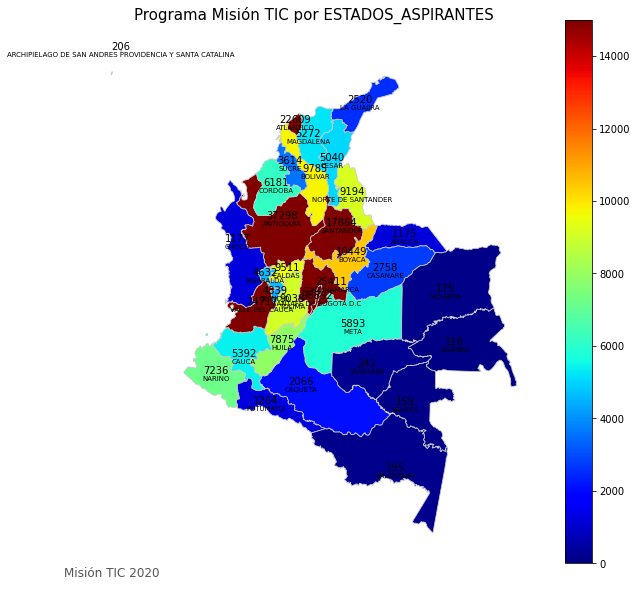

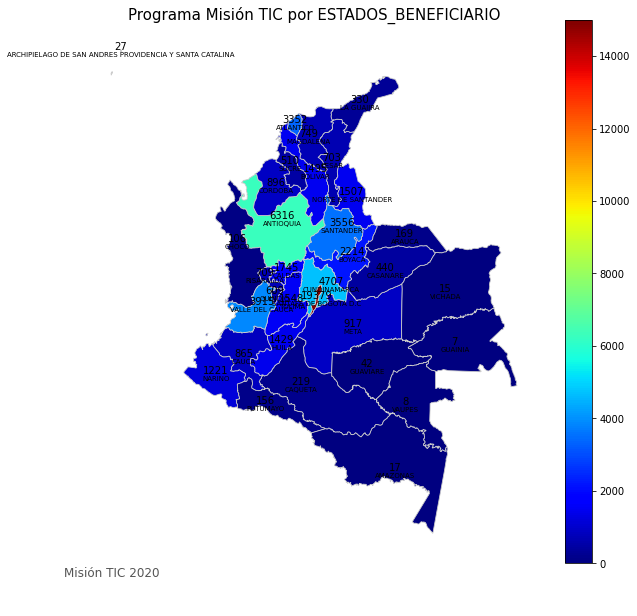

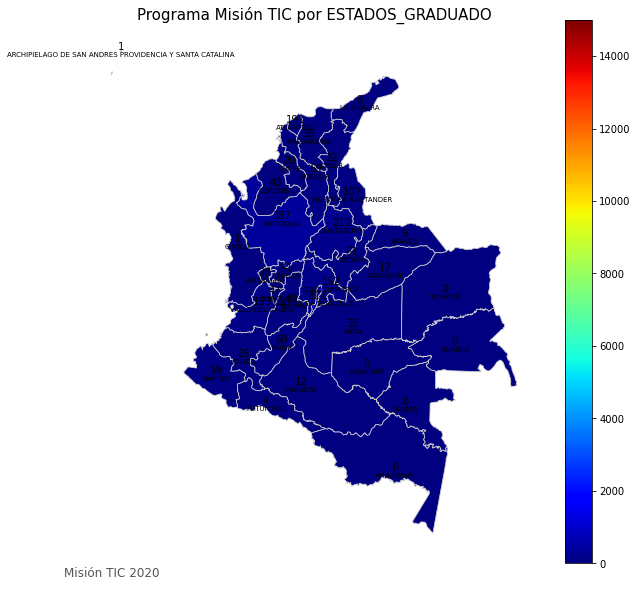

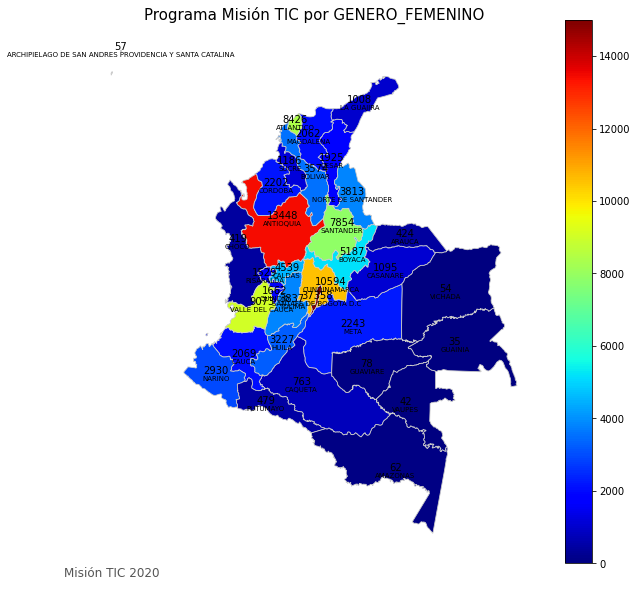

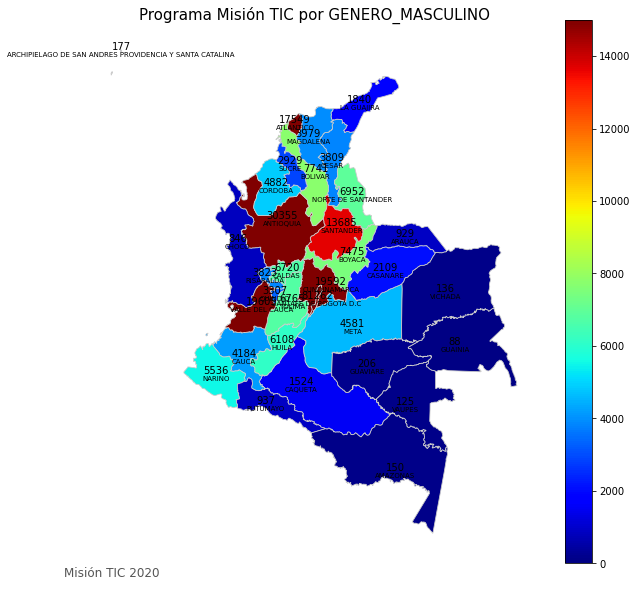

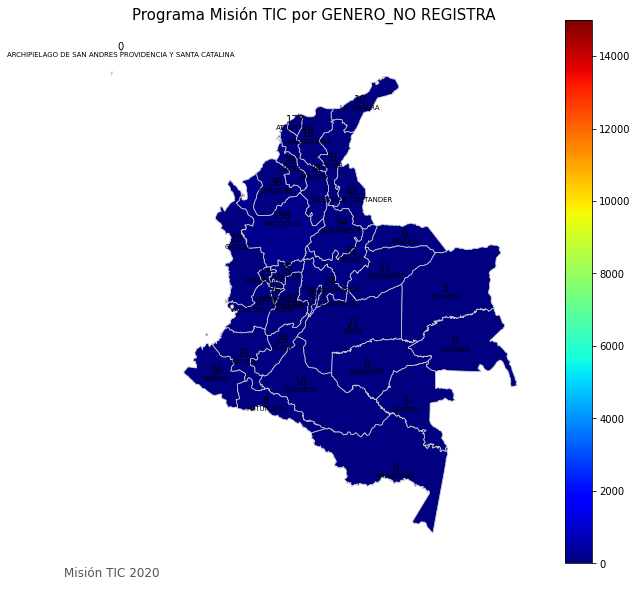

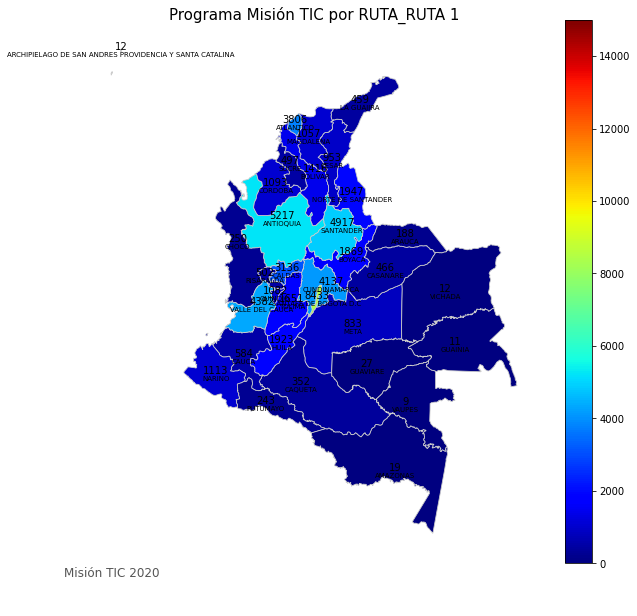

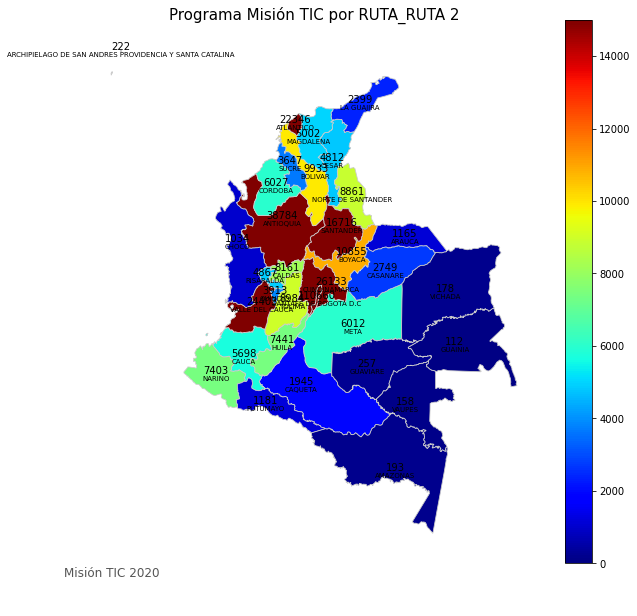

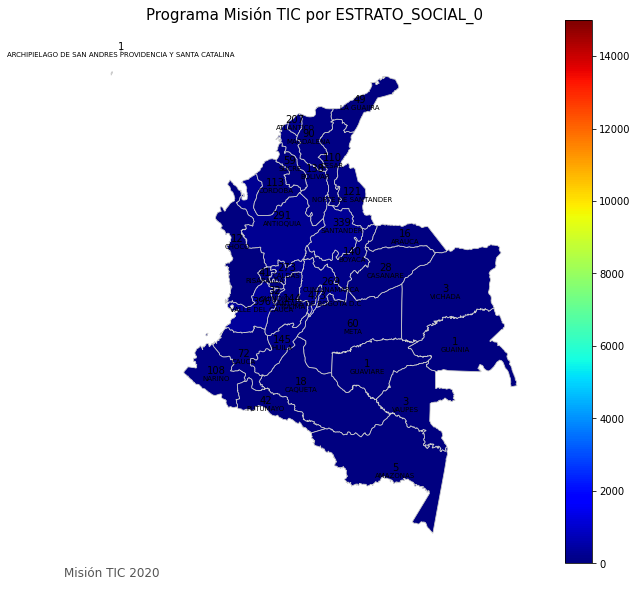

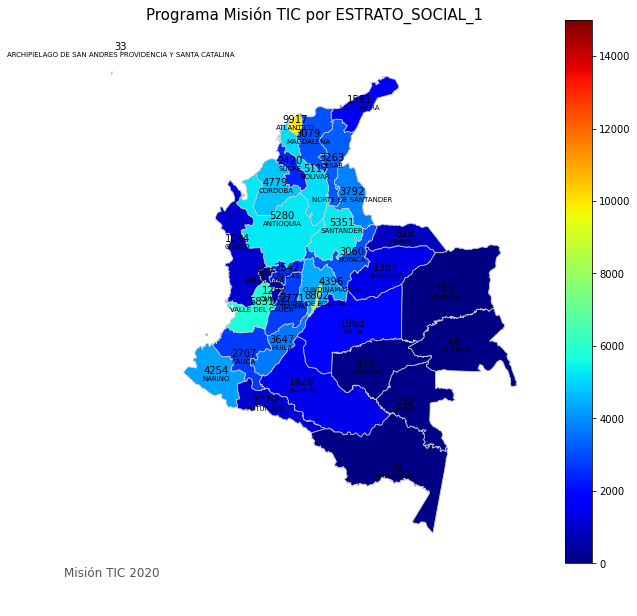

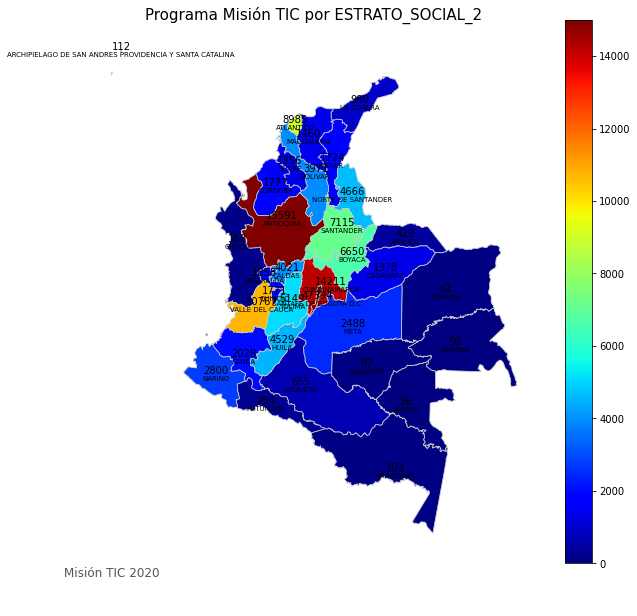

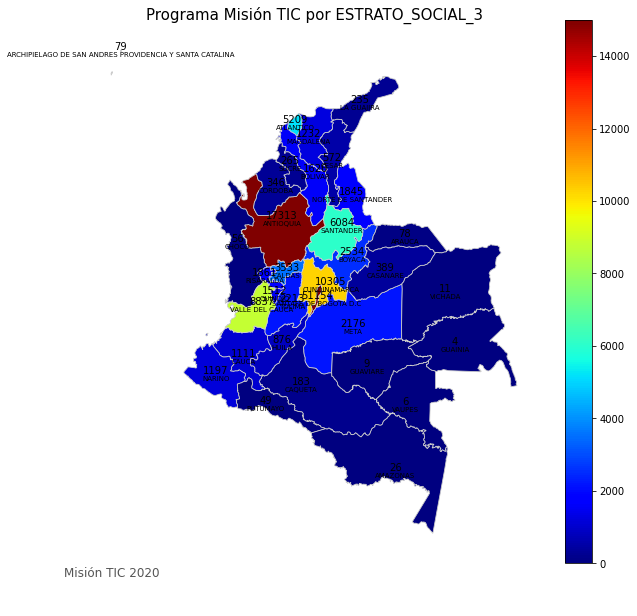

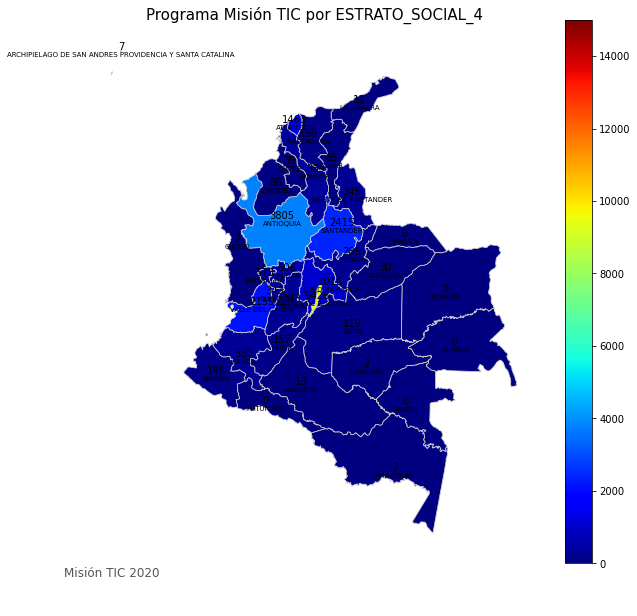

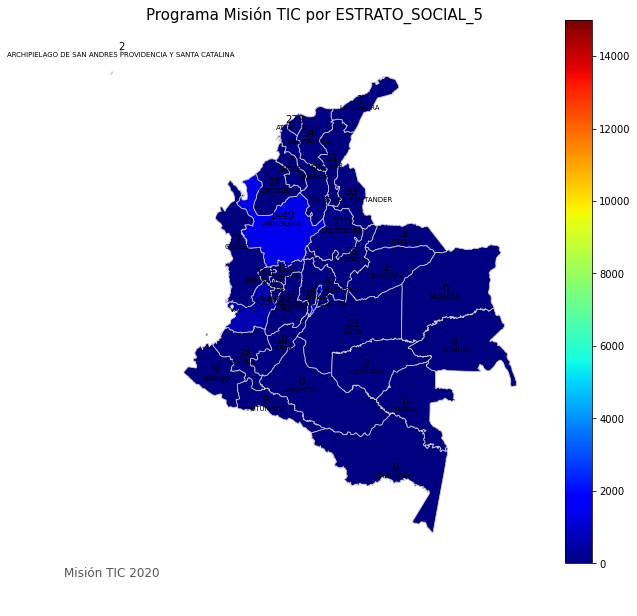

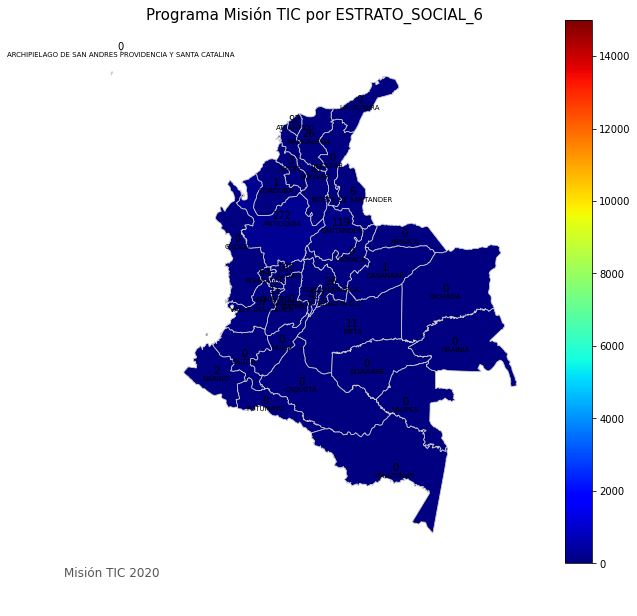

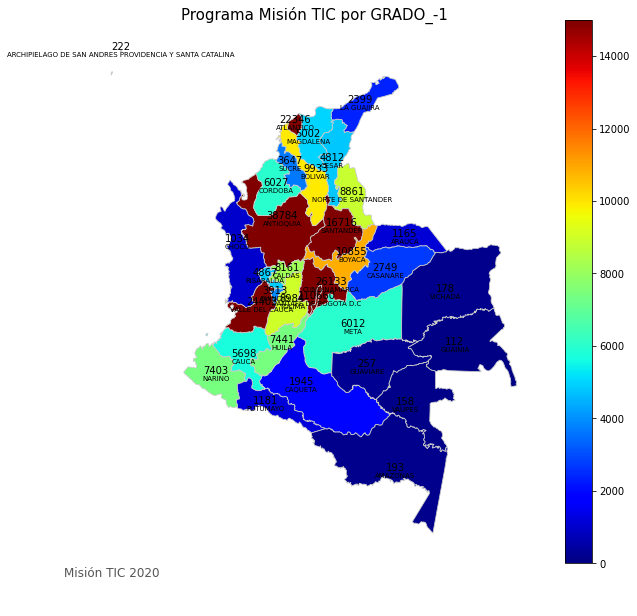

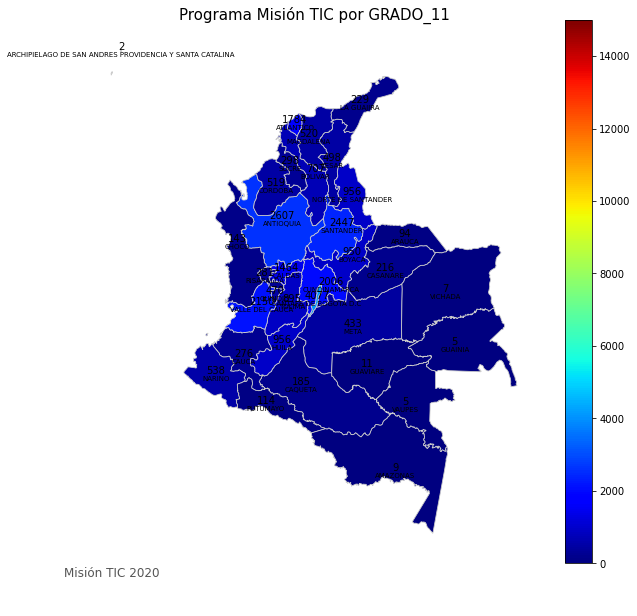

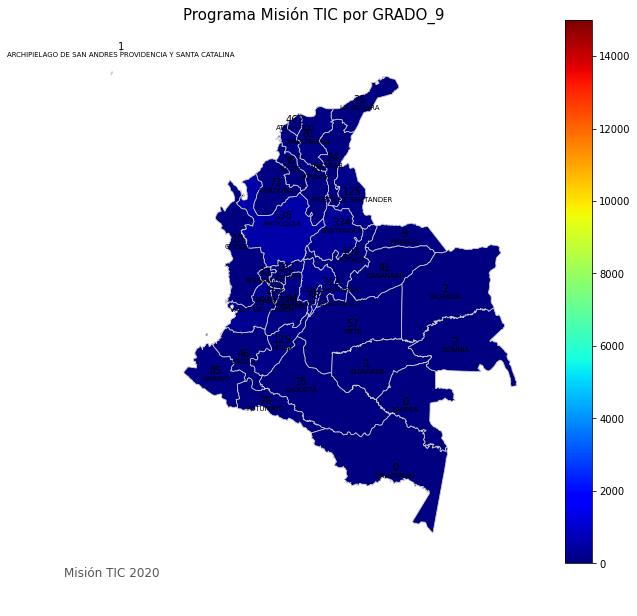

In [ ]:
for i in range(6,24):
    make_plot(df_join_count,i)